Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [21]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [17]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [26]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [27]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='int',class_names=None,color_mode='rgb',batch_size=batch_size,image_size=(img_height,img_width),shuffle=True,seed=123,validation_split=0.2,subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='int',class_names=None,color_mode='rgb',batch_size=batch_size,image_size=(img_height,img_width),shuffle=True,seed=123,validation_split=0.2,subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

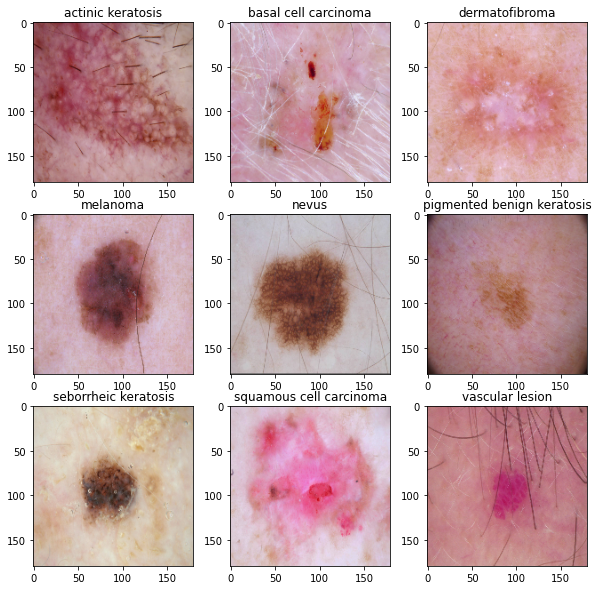

In [18]:
i = 0
plt.figure(figsize=(10, 10))
for class_name in class_names:
  path = os.path.join(data_dir_train, class_name)
  for images in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, images))[...,::-1]
    resized_arr = cv2.resize(img_arr, (img_height, img_width))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(resized_arr)
    plt.title(class_name)
    break
  i = i + 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [22]:
### Your code goes here
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(10, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [23]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Train the model

In [25]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 108s 2s/step - loss: 2.5156 - accuracy: 0.1691 - val_loss: 2.0814 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 90s 2s/step - loss: 2.0234 - accuracy: 0.2372 - val_loss: 1.7478 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 98s 2s/step - loss: 1.8894 - accuracy: 0.3343 - val_loss: 1.6369 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 90s 2s/step - loss: 1.7609 - accuracy: 0.4012 - val_loss: 1.6845 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 99s 2s/step - loss: 1.6389 - accuracy: 0.4436 - val_loss: 1.5697 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 94s 2s/step - loss: 1.5028 - accuracy: 0.4978 - val_loss: 1.5513 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 107s 2s/step - loss: 1.4666 - accuracy: 0.5011 - val_loss: 1.5097 - val_accuracy: 0.4922
Epoch 8/20
56/56 [

In [28]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 118336)            0         
_________________________________________________________________
dense (Dense)                (None, 128)              

### Visualizing training results

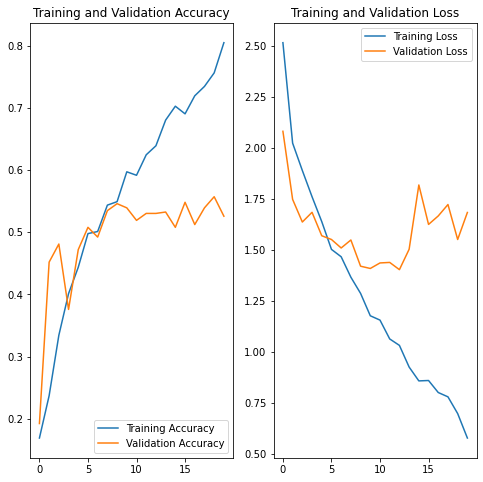

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1.   Model Accuracy on training data is increasing after evry epoch
2.   Model Accuracy is very less compare to train data
3.   This is indication of overfitting model 

In [30]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

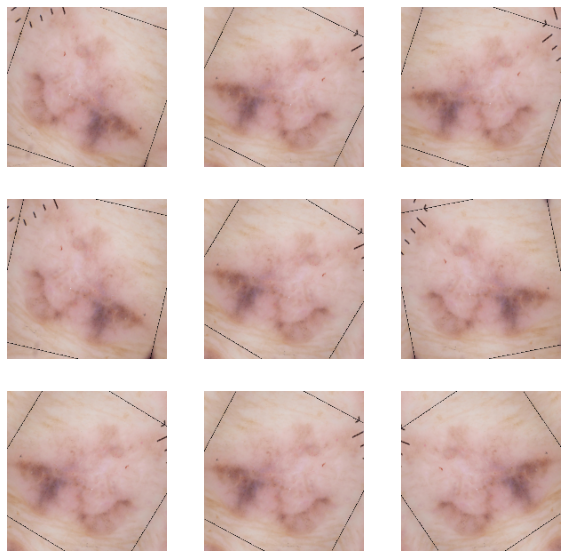

In [31]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
model2 = Sequential()
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model2.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# flatten and put a fully connected layer
model2.add(Flatten())
model2.add(Dense(128, activation='relu')) # fully connected
model2.add(Dropout(0.5))

# softmax layer
model2.add(Dense(10, activation='softmax'))



### Compiling the model

In [33]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Training the model

In [34]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  augmented_train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 87s 2s/step - loss: 2.2719 - accuracy: 0.2215 - val_loss: 1.8664 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 89s 2s/step - loss: 1.8317 - accuracy: 0.3544 - val_loss: 1.8098 - val_accuracy: 0.2975
Epoch 3/20
56/56 [==============================] - 90s 2s/step - loss: 1.6803 - accuracy: 0.3934 - val_loss: 1.5395 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 90s 2s/step - loss: 1.5645 - accuracy: 0.4598 - val_loss: 1.5338 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 90s 2s/step - loss: 1.5578 - accuracy: 0.4604 - val_loss: 1.4795 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 90s 2s/step - loss: 1.4939 - accuracy: 0.4844 - val_loss: 1.4525 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 92s 2s/step - loss: 1.4919 - accuracy: 0.4805 - val_loss: 1.4807 - val_accuracy: 0.4899
Epoch 8/20
56/56 [==

### Visualizing the results

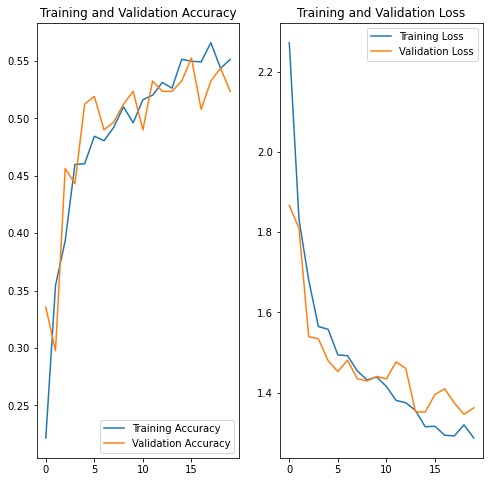

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- We added Dropout in this model.
- As we used augmented images the difference between test and train is now reduced
- This has helped in reducing the overfitting , but still teh accurcy is not upto the mark.
- we will try to improve this by other technicques

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [37]:
## Your code goes here.
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]

path_list[0]

'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg'

In [38]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list[0]

'actinic keratosis'

In [39]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [40]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [41]:
original_df.head()

,Path,Label
0,CNN_assignment\Skin cancer ISIC The Internatio...,actinic keratosis
1,CNN_assignment\Skin cancer ISIC The Internatio...,actinic keratosis
2,CNN_assignment\Skin cancer ISIC The Internatio...,actinic keratosis
3,CNN_assignment\Skin cancer ISIC The Internatio...,actinic keratosis
4,CNN_assignment\Skin cancer ISIC The Internatio...,actinic keratosis


<AxesSubplot:>

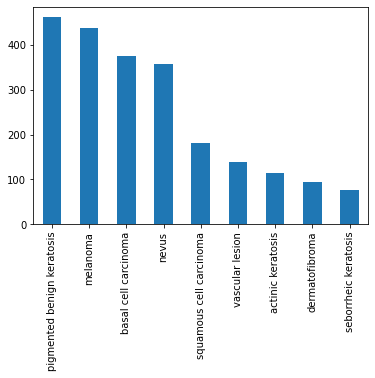

In [42]:
original_df['Label'].value_counts().plot.bar()

#### **Todo:** Write your findings here: 

#### - Which class has the least number of samples?
- seborrheic keratosis has least samples 77
- dermatofibroma has second least samples


#### - Which classes dominate the data in terms proportionate number of samples?
below classes dominate the sample data
- pigmented benign keratosis 462
- melanoma 438 
- basal cell carcinoma 376



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
#pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [48]:
path_to_training_dataset="CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
import Augmentor
for i in class_names:
    #print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0C2420A0>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:18<00:00, 27.28 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0C6C3970>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:18<00:00, 26.39 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0CDB98E0>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 29.57 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x18E0C3265E0>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:25<00:00,  5.85 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1008x711 at 0x18E0BF0E310>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:12<00:00,  6.91 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0BF27D30>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 26.01 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x18E0AD657F0>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:41<00:00, 12.17 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0ABE2F40>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 29.38 Samples/s]
Executing Pipeline:   0%|                                                                                                                                                                                     | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18E0BF1EB50>: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 29.61 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [49]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [55]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_05dfdc80-2016-423b-b5ad-edf349a7ccc8.jpg'

In [56]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0]

'actinic keratosis'

In [57]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [58]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<AxesSubplot:>

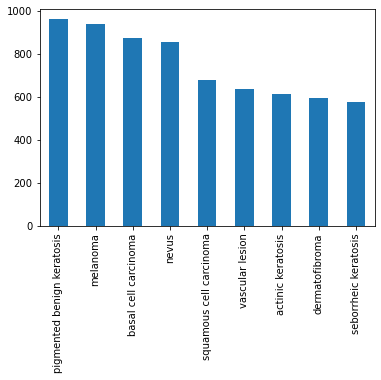

In [60]:
new_df['Label'].value_counts().plot.bar()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [61]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [63]:
data_dir_train="CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [64]:
## your code goes here
model3 = Sequential()
model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model3.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model3.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# flatten and put a fully connected layer
model3.add(Flatten())
model3.add(Dense(128, activation='relu')) # fully connected
model3.add(Dropout(0.5))

# softmax layer
model3.add(Dense(10, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [65]:
## your code goes here
model3.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [66]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 305s 2s/step - loss: 1.4581 - accuracy: 0.4477 - val_loss: 1.3231 - val_accuracy: 0.4796
Epoch 2/50
169/169 [==============================] - 285s 2s/step - loss: 1.3637 - accuracy: 0.4805 - val_loss: 1.3073 - val_accuracy: 0.4900
Epoch 3/50
169/169 [==============================] - 287s 2s/step - loss: 1.2901 - accuracy: 0.5069 - val_loss: 1.1665 - val_accuracy: 0.5397
Epoch 4/50
169/169 [==============================] - 285s 2s/step - loss: 1.2111 - accuracy: 0.5371 - val_loss: 1.0806 - val_accuracy: 0.5612
Epoch 5/50
169/169 [==============================] - 285s 2s/step - loss: 1.1320 - accuracy: 0.5772 - val_loss: 1.0599 - val_accuracy: 0.5724
Epoch 6/50
169/169 [==============================] - 285s 2s/step - loss: 1.0801 - accuracy: 0.5899 - val_loss: 1.0571 - val_accuracy: 0.6006
Epoch 7/50
169/169 [==============================] - 285s 2s/step - loss: 0.9734 - accuracy: 0.6346 - val_loss: 0.8958 - val_accuracy: 0.6830

#### **Todo:**  Visualize the model results

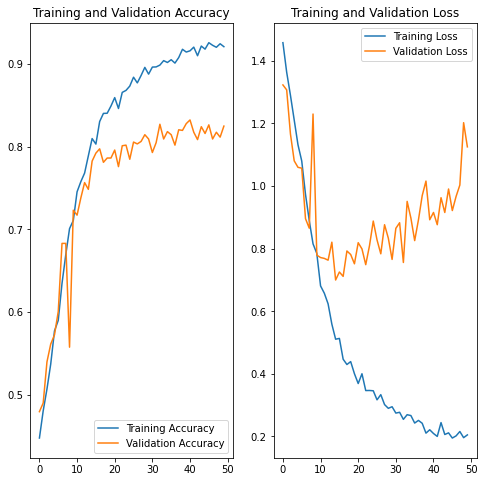

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- First model was plain vannila model , we observed that model is overfitting
- For second model , we have twisted our tarining data and it has helped us reducing the overfitting.
- Second model is little underfit.
- We analysed the sample numbers and indetified few classes has less represenation and few has high 
  - Low Represnataion classes
        seborrheic keratosis has least samples 77
        dermatofibroma has second least samples 
  - High Represantation classes
        pigmented benign keratosis 462
        melanoma 438
        basal cell carcinoma 376
- With help of Augmentor we created 500 new images of each class, it has give some balancing to the class.
- Final model was tarined on the new dataset and we saw very good improvement on tarin and test accuracy.